# Importing Libraries

In [1]:
# Basics Library
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import pylab

# For Visulization 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from wordcloud import WordCloud


# Preprocessig for Data Encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler

# For split data in train and test part , And GridSearchCV other use for Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,RandomizedSearchCV

# Use Diff Classifier for Model Learning
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from pprint import pprint


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error


# EDA and Pre-processing¶
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format

In [2]:
df_NYC = pd.read_csv('NYC listings.csv')
df_NYC.head()

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20210204180331   2021-02-05   
1  3831  https://www.airbnb.com/rooms/3831  20210204180331   2021-02-05   
2  5121  https://www.airbnb.com/rooms/5121  20210204180331   2021-02-05   
3  5178  https://www.airbnb.com/rooms/5178  20210204180331   2021-02-05   
4  5203  https://www.airbnb.com/rooms/5203  20210204180331   2021-02-06   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                    BlissArtsSpace!   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3    Theater district, many restaurants around here.   
4  Our neighborhood is full of restaurants and ca...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
3  https://a0.muscache.com/pictures/12065/f070997...     8967   
4  https://a0.muscache.com/pictures/103776/b37157...     7490   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        10.0   
1  https://www.airbnb.com/users/show/4869  ...                        10.0   
2  https://www.airbnb.com/users/show/7356  ...                        10.0   
3  https://www.airbnb.com/users/show/8967  ...                         9.0   
4  https://www.airbnb.com/users/show/7490  ...                        10.0   

  review_scores_location review_scores_value license instant_bookable  \
0                   10.0                 9.0     NaN                f   
1                   10.0                10.0     NaN                f   
2                    9.0                 9.0     NaN                f   
3                   10.0                 9.0     NaN                f   
4                   10.0                10.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              1                                           1   
2                              1                                           0   
3                              1                                           0   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.35  
1                                           0              4.99  
2                                           0              0.35  
3                                           0              3.31  
4                                           0              0.85  

[5 rows x 74 columns]

In [3]:
pd.set_option('display.max_rows', df_NYC.shape[0]+1)
df_NYC.describe(include = 'all').transpose()


count unique  \
id                                            37012    NaN   
listing_url                                   37012  37012   
scrape_id                                     37012    NaN   
last_scraped                                  37012      3   
name                                          36999  35912   
description                                   35789  33912   
neighborhood_overview                         23329  19385   
picture_url                                   37012  36148   
host_id                                       37012    NaN   
host_url                                      37012  26765   
host_name                                     36994   9091   
host_since                                    36994   4000   
host_location                                 36896   1329   
host_about                                    22168  15481   
host_response_time                            18505      4   
host_response_rate                            18505     77   
host_acceptance_rate                          22379     98   
host_is_superhost                             36994      2   
host_thumbnail_url                            36994  26662   
host_picture_url                              36994  26662   
host_neighbourhood                            30323    423   
host_listings_count                           36994    NaN   
host_total_listings_count                     36994    NaN   
host_verifications                            37012    524   
host_has_profile_pic                          36994      2   
host_identity_verified                        36994      2   
neighbourhood                                 23329    221   
neighbourhood_cleansed                        37012    220   
neighbourhood_group_cleansed                  37012      5   
latitude                                      37012    NaN   
longitude                                     37012    NaN   
property_type                                 37012     75   
room_type                                     37012      4   
accommodates                                  37012    NaN   
bathrooms                                         0    NaN   
bathrooms_text                                36910     36   
bedrooms                                      33404    NaN   
beds                                          36522    NaN   
amenities                                     37012  31671   
price                                         37012    733   
minimum_nights                                37012    NaN   
maximum_nights                                37012    NaN   
minimum_minimum_nights                        36894    NaN   
maximum_minimum_nights                        36894    NaN   
minimum_maximum_nights                        36894    NaN   
maximum_maximum_nights                        36894    NaN   
minimum_nights_avg_ntm                        36894    NaN   
maximum_nights_avg_ntm                        36894    NaN   
calendar_updated                                  0    NaN   
has_availability                              37012      2   
availability_30                               37012    NaN   
availability_60                               37012    NaN   
availability_90                               37012    NaN   
availability_365                              37012    NaN   
calendar_last_scraped                         37012      3   
number_of_reviews                             37012    NaN   
number_of_reviews_ltm                         37012    NaN   
number_of_reviews_l30d                        37012    NaN   
first_review                                  27489   3274   
last_review                                   27489   2226   
review_scores_rating                          26777    NaN   
review_scores_accuracy                        26753    NaN   
review_scores_cleanliness                     26764    NaN   
review_scores_checkin                         26741    NaN   
review_scores_co

ID is just a random number so we dropped it 

In [4]:
len(df_NYC["id"].unique())
df_NYC.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
to_drop= ['listing_url', 'scrape_id', 'last_scraped',
'name', 'description', 'neighborhood_overview', 'picture_url','host_is_superhost',
'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
'host_about', 'host_response_time', 'host_response_rate',
'host_acceptance_rate','host_thumbnail_url',
'host_picture_url', 'host_listings_count',
'host_total_listings_count', 'host_verifications',
'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','neighbourhood_cleansed', 'bathrooms',
'amenities', 'maximum_nights', 'minimum_minimum_nights',
'maximum_minimum_nights', 'minimum_maximum_nights',
'maximum_maximum_nights', 'minimum_nights_avg_ntm',
'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
'availability_30', 'availability_60', 'availability_90',
'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
'last_review','review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin',
'review_scores_communication', 'review_scores_location',
'review_scores_value', 'license',
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


"\nto_drop= ['listing_url', 'scrape_id', 'last_searched', 'last_scraped',\n'name', 'description', 'neighborhood_overview', 'picture_url',\n'host_id', 'host_url', 'host_name', 'host_since', 'host_location',\n'host_about', 'host_response_time', 'host_response_rate',\n'host_acceptance_rate','host_thumbnail_url',\n'host_picture_url', 'host_listings_count',\n'host_total_listings_count', 'host_verifications',\n'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','room_type', 'bathrooms',\n'amenities', 'maximum_nights', 'minimum_minimum_nights',\n'maximum_minimum_nights', 'minimum_maximum_nights',\n'maximum_maximum_nights', 'minimum_nights_avg_ntm',\n'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',\n'availability_30', 'availability_60', 'availability_90',\n'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',\n'last_review','review_scores_accuracy',\n'review_scores_cleanliness', 'review_scores_checkin',\n'review_scores_commun

In [6]:
df_NYC.drop(columns=to_drop, inplace=True)
df_NYC.head()

id  host_neighbourhood neighbourhood_group_cleansed  latitude  longitude  \
0  2595             Midtown                    Manhattan  40.75362  -73.98377   
1  3831        Clinton Hill                     Brooklyn  40.68514  -73.95976   
2  5121  Bedford-Stuyvesant                     Brooklyn  40.68688  -73.95596   
3  5178      Hell's Kitchen                    Manhattan  40.76468  -73.98315   
4  5203     Upper West Side                    Manhattan  40.80178  -73.96723   

               property_type        room_type  accommodates bathrooms_text  \
0           Entire apartment  Entire home/apt             2         1 bath   
1         Entire guest suite  Entire home/apt             3         1 bath   
2  Private room in apartment     Private room             2            NaN   
3  Private room in apartment     Private room             2         1 bath   
4  Private room in apartment     Private room             1  1 shared bath   

   bedrooms  beds    price  minimum_nights  availability_365  \
0       NaN   1.0  $100.00              30               365   
1       1.0   3.0   $73.00               1               249   
2       1.0   1.0   $60.00              30               365   
3       1.0   1.0   $79.00               2               343   
4       1.0   1.0   $75.00               2                 0   

   number_of_reviews  review_scores_rating instant_bookable  
0                 48                  94.0                f  
1                386                  90.0                f  
2                 50                  90.0                f  
3                474                  84.0                f  
4                118                  98.0                f

In [7]:
df_NYC.shape

(37012, 17)

In [8]:
df_NYC.dtypes

id                                int64
host_neighbourhood               object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
price                            object
minimum_nights                    int64
availability_365                  int64
number_of_reviews                 int64
review_scores_rating            float64
instant_bookable                 object
dtype: object

In [9]:
print(df_NYC.isna().sum())

id                                  0
host_neighbourhood               6689
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_text                    102
bedrooms                         3608
beds                              490
price                               0
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating            10235
instant_bookable                    0
dtype: int64


# Data Cleaning and Transformation


### We drop any entries that are inconsistent; i.e. predictors accommodates, bedrooms, beds, or price with a value of 0.

We convert the format in price from $1.00 into a float of 1.00. because price has type object and we have to convert it into float.

In [10]:
# convert formatting for price
df_NYC['price'] = (df_NYC['price'].str.replace(r'[^-+\d.]', '').astype(float))

In [11]:
# drop any inconsistent values
print('How many of Accommodates have value 0:', len(df_NYC[df_NYC['accommodates'] == 0]))
print('How many of Bedrooms have value 0:', len(df_NYC[df_NYC['bedrooms'] == 0]))
print('How many of Beds have value 0:', len(df_NYC[df_NYC['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(df_NYC[df_NYC['price'] == 0.00]))


How many of Accommodates have value 0: 13
How many of Bedrooms have value 0: 0
How many of Beds have value 0: 1391
Number of Listings with Price $0.00: 28


Now drop all inconsistant values

In [12]:
df_NYC = df_NYC[df_NYC['accommodates'] != 0]
df_NYC = df_NYC[df_NYC['bedrooms'] != 0]
df_NYC = df_NYC[df_NYC['beds'] != 0]
df_NYC = df_NYC[df_NYC['price'] != 0.00]

### Price

In [13]:
df_NYC["price"].describe()

count    35593.000000
mean       142.396258
std        267.328306
min         10.000000
25%         60.000000
50%         99.000000
75%        154.000000
max      10000.000000
Name: price, dtype: float64

We see that the average price is 142.84 dollars. Price varies between 0 to 10K$

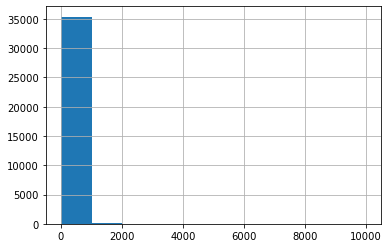

In [14]:
### See the distribution of price

hist_price=df_NYC["price"].hist()
### We observe that most listings have price less than $1000

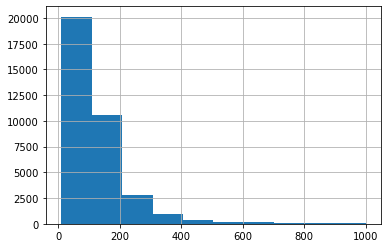

In [15]:
### Lets plot histogram for prices less than $1000

hist_price1=df_NYC["price"][df_NYC["price"]<1000].hist()
### This give a clearer picture!

How many listings have price more than 1000?

In [16]:
df_NYC[df_NYC["price"]>1000].shape

(217, 17)

we can see that only 236 listings have price per day > 1000. These are either super lavish listings or there was an error during input. Nonetheless, since this records are skewing our data a lot, we will treat them as outliers and drop them.

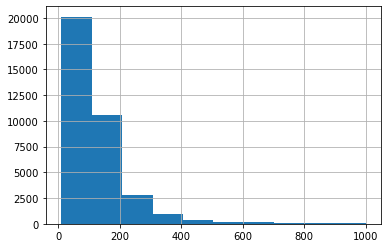

In [17]:
df_NYC=df_NYC[df_NYC["price"]<1000]

### We see a more Gaussian distribution here
hist_price2=df_NYC["price"][df_NYC["price"]<1000].hist()

In [18]:
### We use 500 as threshold price

df_NYC=df_NYC[df_NYC["price"]<1000]

### Looking at the price column again
df_NYC["price"].describe()

count    35336.000000
mean       127.736303
std        110.049124
min         10.000000
25%         60.000000
50%         99.000000
75%        150.000000
max        999.000000
Name: price, dtype: float64

In [19]:
df_NYC.shape

(35336, 17)

We see that the average price is 127. Price varies between 0 to 999 and we still have enough records 36,735 listings

Although we have removed potential outliers But still the distribution of the 'price' is not normmally distributed. So we have apply some transformation to convert it into normally distribution we can do by applying log transformation price column which is also our response varibale 

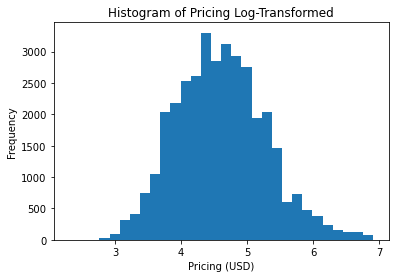

In [20]:
# log transform of 'price'
df_NYC['price_log'] = df_NYC['price'].apply(lambda x: math.log(x))

# visualize distribution of price (target variable)
plt.hist(df_NYC['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD)")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Q-Q plot for log-transformed pricing')

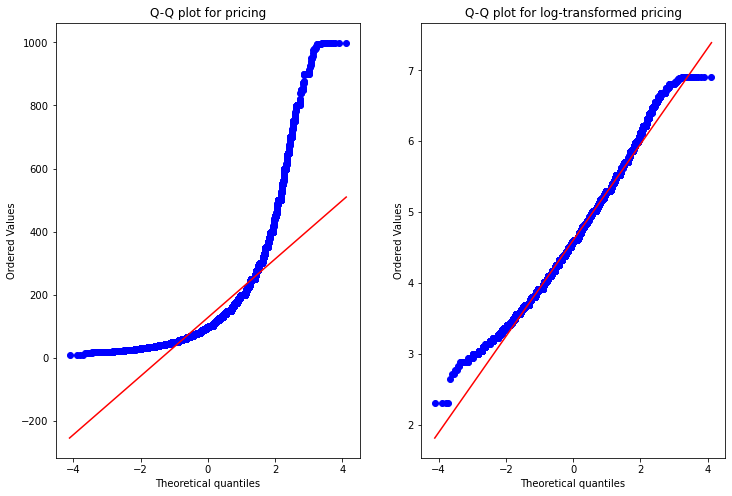

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.subplot(1, 2, 1)
stats.probplot(df_NYC['price'], dist="norm", plot=pylab)
plt.title("Q-Q plot for pricing")

plt.subplot(1, 2, 2)
stats.probplot(df_NYC['price_log'], dist="norm", plot=pylab)
plt.title("Q-Q plot for log-transformed pricing")


### Missing Value dealing

In [22]:
df_NYC.isnull().sum()

id                                 0
host_neighbourhood              6301
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                    73
bedrooms                        3294
beds                             456
price                              0
minimum_nights                     0
availability_365                   0
number_of_reviews                  0
review_scores_rating            9623
instant_bookable                   0
price_log                          0
dtype: int64

'host_neighbourhood' is a categorical variables so we will fill the missing value with most frequent value within column. 
'bedrooms' and 'beds' have numerical datatypes so we will fill the missing values by median

In [23]:
# mode = df_NYC['host_is_superhost'].mode()
# df_NYC['host_is_superhost'].fillna(mode[0], inplace=True)

mode = df_NYC['host_neighbourhood'].mode()
df_NYC['host_neighbourhood'].fillna(mode[0], inplace=True)

median = df_NYC['bedrooms'].median()
df_NYC['bedrooms'].fillna(median, inplace=True)

median = df_NYC['beds'].median()
df_NYC['beds'].fillna(median, inplace=True)

'bathrooms_text' contains string data but we need only numerical number of bathrooms in accommodation for our price modeling so we use regular expression for it 

In [24]:
df_NYC['bathrooms_text'].unique()

array(['1 bath', nan, '1 shared bath', '1 private bath', '2 baths',
       '1.5 baths', '1.5 shared baths', '3 baths', 'Half-bath',
       '2 shared baths', '2.5 baths', '0 baths', '5 baths',
       '0 shared baths', 'Shared half-bath', '4.5 baths', '5.5 baths',
       '2.5 shared baths', '3.5 baths', '4 baths', '3 shared baths',
       '4 shared baths', 'Private half-bath', '3.5 shared baths',
       '6 shared baths', '6.5 shared baths', '7.5 baths',
       '4.5 shared baths', '5.5 shared baths', '6 baths',
       '8 shared baths', '5 shared baths', '6.5 baths', '8 baths',
       '7 baths'], dtype=object)

In [25]:
df_NYC['bathrooms_text']=df_NYC['bathrooms_text'].str.extract('(\d*\.?\d+)')
median = df_NYC['bathrooms_text'].median()
df_NYC['bathrooms_text'].fillna(median, inplace=True)

df_NYC = df_NYC[df_NYC['bathrooms_text'] != 0]
df_NYC = df_NYC.rename(columns = {'bathrooms_text': 'bathrooms'})

There are 9623 listings that have review_scores_rating with NaN values. We will handle this by turning the review_scores_ratings into a categorical predictor. We replace NaN values with 'No Reviews'. We will also convert the review_scores_ratings into buckets. We will have the bucket ranges set more closely to a higher review score to accomodate for the skewed left distribution of the review scores.

In [26]:
df_NYC['review_scores_rating'].fillna('No Review', inplace=True)

In [27]:
# convert review_scores_rating into buckets

def buckets_conversion(val):
    if val == 'No Review':
        return 'No Review'
    elif val >= 90.0:
        return '90-100'
    elif val >= 80.0 and val < 90.0:
        return '80-89'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

df_NYC['review_scores_rating'] = df_NYC['review_scores_rating'].apply(buckets_conversion)
df_NYC['review_scores_rating'].unique()

array(['90-100', '80-89', 'No Review', '70-79', '60-69', '50-59', '20-29',
       '40-49', '30-39'], dtype=object)

In [28]:
df_NYC.isnull().sum()

id                              0
host_neighbourhood              0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating            0
instant_bookable                0
price_log                       0
dtype: int64

# Descriptive Analysis of Data

In [29]:
df_NYC.dtypes

id                                int64
host_neighbourhood               object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                        object
bedrooms                        float64
beds                            float64
price                           float64
minimum_nights                    int64
availability_365                  int64
number_of_reviews                 int64
review_scores_rating             object
instant_bookable                 object
price_log                       float64
dtype: object

In [30]:
df_NYC['bathrooms']=df_NYC['bathrooms'].astype(float)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as k

Text(0.5, 1.0, 'Scatter plot for Log price vs Beds')

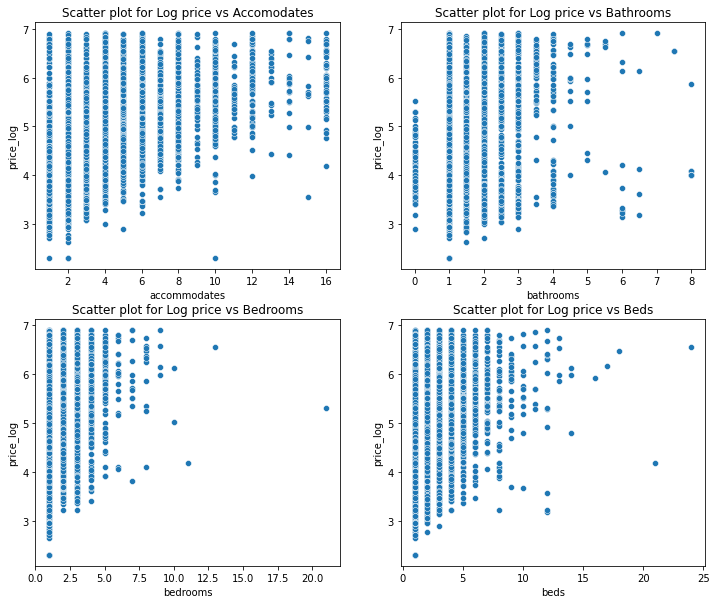

In [31]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(df_NYC.accommodates, df_NYC.price_log)
plt.title("Scatter plot for Log price vs Accomodates")

plt.subplot(2, 2, 2)
sns.scatterplot(df_NYC.bathrooms, df_NYC.price_log)
plt.title("Scatter plot for Log price vs Bathrooms")

plt.subplot(2, 2, 3)
sns.scatterplot(df_NYC.bedrooms, df_NYC.price_log)
plt.title("Scatter plot for Log price vs Bedrooms")

plt.subplot(2, 2, 4)
sns.scatterplot(df_NYC.beds, df_NYC.price_log)
plt.title("Scatter plot for Log price vs Beds")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Scatter plot for Log price vs Number of Reviews')

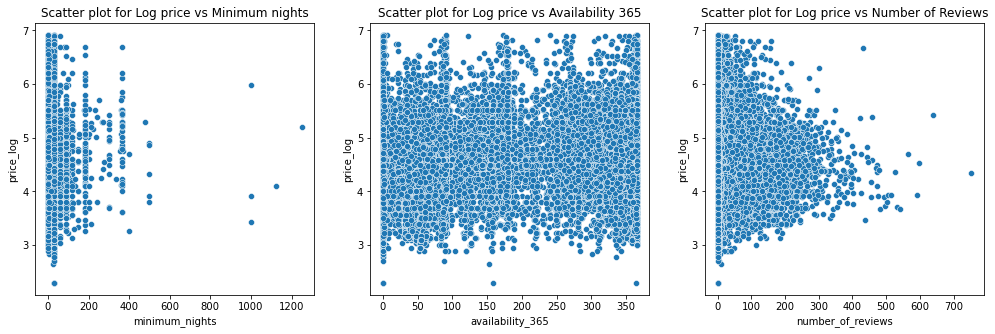

In [32]:

fig, ax = plt.subplots(figsize=(17, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(df_NYC.minimum_nights, df_NYC.price_log)
plt.title("Scatter plot for Log price vs Minimum nights")

plt.subplot(1, 3, 2)
sns.scatterplot(df_NYC.availability_365, df_NYC.price_log)
plt.title("Scatter plot for Log price vs Availability 365")

plt.subplot(1, 3, 3)
sns.scatterplot(df_NYC.number_of_reviews, df_NYC.price_log)
plt.title("Scatter plot for Log price vs Number of Reviews")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '90-100'),
  Text(1, 0, '80-89'),
  Text(2, 0, 'No Review'),
  Text(3, 0, '70-79'),
  Text(4, 0, '60-69'),
  Text(5, 0, '50-59'),
  Text(6, 0, '20-29'),
  Text(7, 0, '40-49'),
  Text(8, 0, '30-39')])

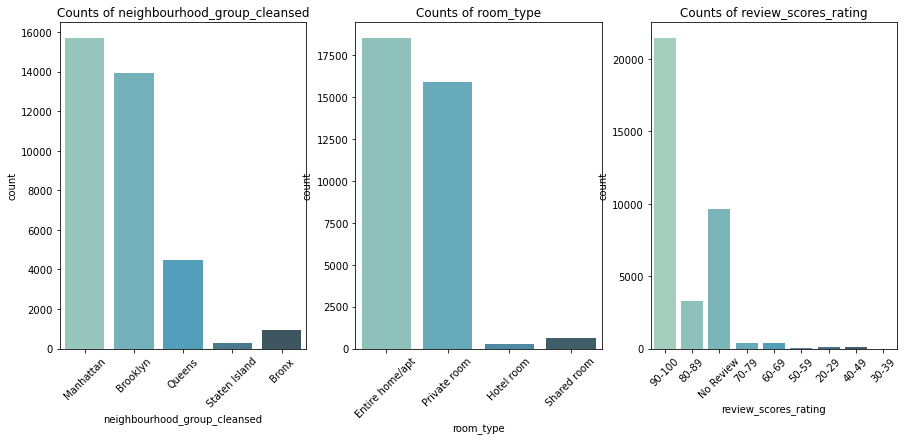

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=df_NYC, x='neighbourhood_group_cleansed', palette='GnBu_d')
plt.title('Counts of neighbourhood_group_cleansed')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(data=df_NYC, x='room_type', palette='GnBu_d')
plt.title('Counts of room_type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.countplot(data=df_NYC, x='review_scores_rating', palette='GnBu_d')
plt.title('Counts of review_scores_rating')
plt.xticks(rotation=45)

### correlations between values

<AxesSubplot:>

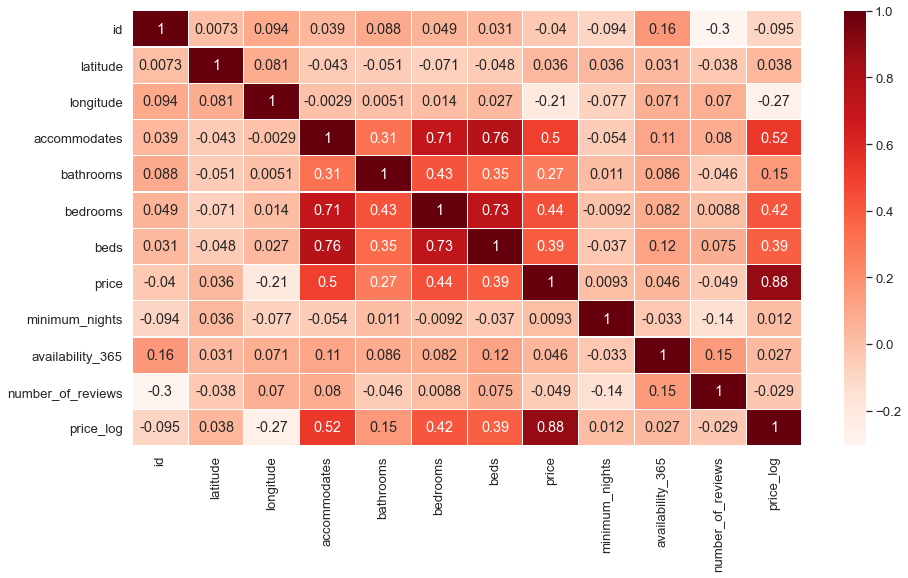

In [34]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.2)
sns.heatmap(df_NYC.corr(), annot=True, linewidths=0.1, cmap='Reds')

### Lets look at neighbourhood groups

In [35]:

df_NYC['neighbourhood_group_cleansed'].value_counts()

Manhattan        15705
Brooklyn         13938
Queens            4491
Bronx              931
Staten Island      271
Name: neighbourhood_group_cleansed, dtype: int64

Lets see the distributuion of price and neighbourhood group. 

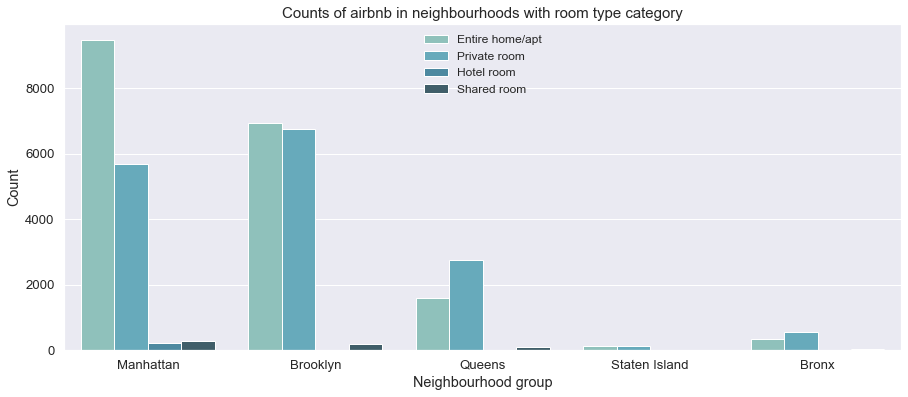

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_NYC, x='neighbourhood_group_cleansed', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

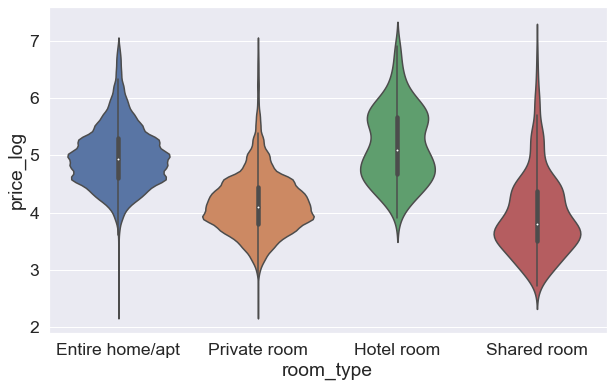

In [37]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.set(font_scale=1.6)
sns.violinplot(data=df_NYC, x='room_type', y='price_log')
plt.show()

#### map of hosts

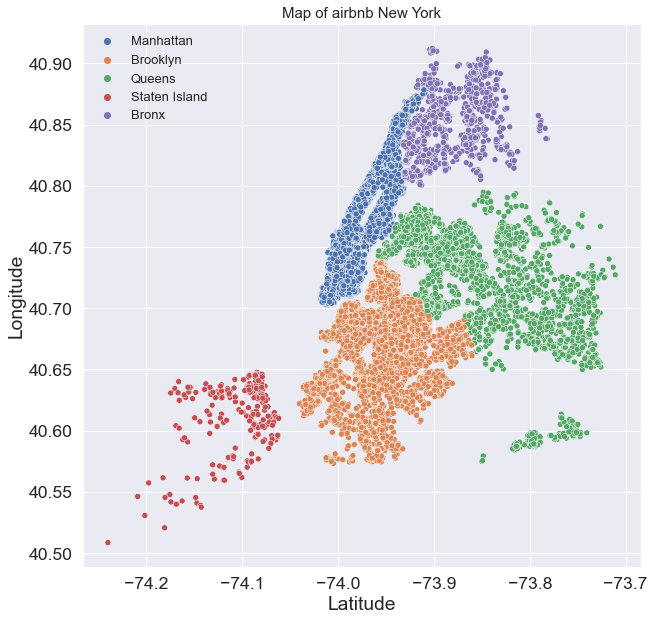

In [38]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=df_NYC, x='longitude', y='latitude', hue='neighbourhood_group_cleansed')
plt.title('Map of airbnb New York', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

In [39]:
NY_map = folium.Map([40.730610,-73.935242],zoom_start=10)
HeatMap(df_NYC[['latitude','longitude']],radius=10).add_to(NY_map)
display(NY_map)

In [40]:
df_NYC[['latitude','longitude']].describe()

latitude     longitude
count  35336.000000  35336.000000
mean      40.729505    -73.950889
std        0.054662      0.048164
min       40.508680    -74.239860
25%       40.690107    -73.983610
50%       40.725280    -73.955650
75%       40.762443    -73.933610
max       40.912140    -73.710870

#### Lets see the distributuion of accommodates predictor 

In [41]:
print('Number of Unique Accomodation: ', np.unique(df_NYC['accommodates']))
for i in range(1, 17):
    print('Accommodation {}:'.format(i), len(df_NYC[df_NYC['accommodates'] == i]))

Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Accommodation 1: 5871
Accommodation 2: 16075
Accommodation 3: 3686
Accommodation 4: 5402
Accommodation 5: 1467
Accommodation 6: 1660
Accommodation 7: 305
Accommodation 8: 457
Accommodation 9: 54
Accommodation 10: 156
Accommodation 11: 29
Accommodation 12: 76
Accommodation 13: 20
Accommodation 14: 18
Accommodation 15: 10
Accommodation 16: 50


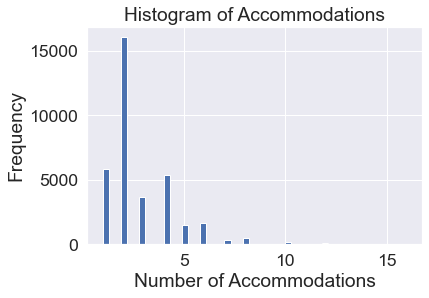

In [42]:
plt.hist(df_NYC['accommodates'], bins=50)
plt.rcParams.update({'font.size': 20})
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

We see that a majority of listings have accomodations for 1-4 people. 1 bed typically accomodates 2 individuals, so let's plot beds instead to analyze how many of the listings are single bedroom listings

#### Lets see the distributuion of beds predictor

In [43]:
print('Number of Unique Beds: ', np.unique(df_NYC['beds']))
for i in range(1, 17):
    print('Beds {}:'.format(i), len(df_NYC[df_NYC['beds'] == i]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 17. 18. 21.
 24.]
Beds 1: 23140
Beds 2: 7638
Beds 3: 2665
Beds 4: 1134
Beds 5: 373
Beds 6: 192
Beds 7: 79
Beds 8: 45
Beds 9: 25
Beds 10: 13
Beds 11: 7
Beds 12: 13
Beds 13: 4
Beds 14: 3
Beds 15: 0
Beds 16: 1


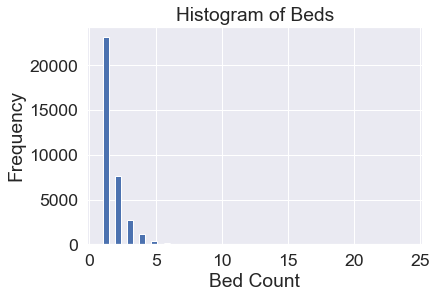

In [44]:
# visualize distribution of beds
plt.hist(df_NYC['beds'], bins=50)
plt.rcParams.update({'font.size': 20})
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

We see that a majority of our listings are indeed single bedroom listings roughly 66%.

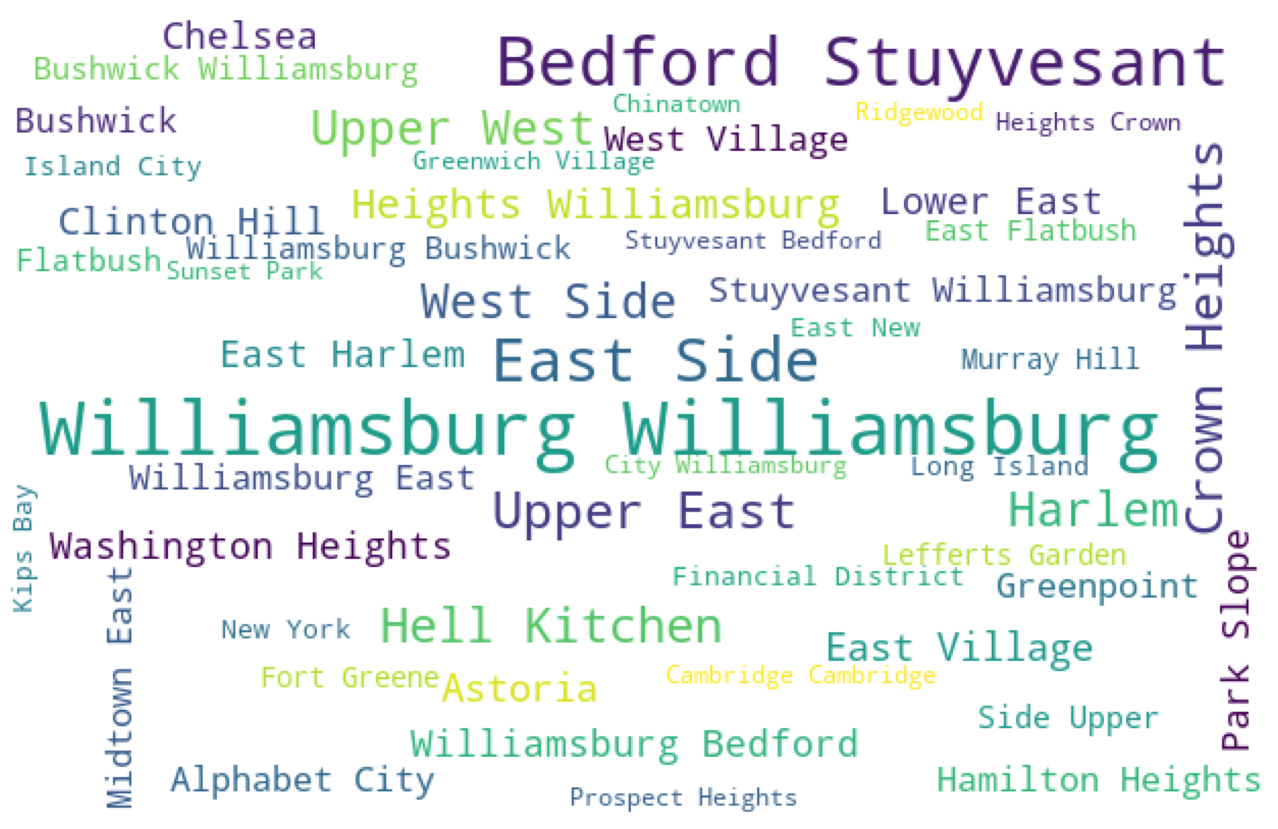

In [45]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=620,
                          height=400,
                          max_words= 50
                         ).generate(" ".join(df_NYC.host_neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('neighbourhood.png')
plt.show()



In [46]:
a=df_NYC.groupby('property_type').count()
a.shape

(71, 17)

In [47]:
sub_df = df_NYC[df_NYC.groupby('property_type').property_type.transform('count')>50].copy()
sub_df.groupby('property_type').count()

id  host_neighbourhood  \
property_type                                            
Entire apartment             14892               14892   
Entire condominium             926                 926   
Entire guest suite             226                 226   
Entire house                   893                 893   
Entire loft                    577                 577   
Entire serviced apartment      278                 278   
Entire townhouse               554                 554   
Private room in apartment    11541               11541   
Private room in condominium    462                 462   
Private room in guest suite     98                  98   
Private room in house         1803                1803   
Private room in loft           341                 341   
Private room in townhouse     1024                1024   
Room in boutique hotel         273                 273   
Room in hotel                  346                 346   
Shared room in apartment       453                 453   
Shared room in house            75                  75   

                             neighbourhood_group_cleansed  latitude  \
property_type                                                         
Entire apartment                                    14892     14892   
Entire condominium                                    926       926   
Entire guest suite                                    226       226   
Entire house                                          893       893   
Entire loft                                           577       577   
Entire serviced apartment                             278       278   
Entire townhouse                                      554       554   
Private room in apartment                           11541     11541   
Private room in condominium                           462       462   
Private room in guest suite                            98        98   
Private room in house                                1803      1803   
Private room in loft                                  341       341   
Private room in townhouse                            1024      1024   
Room in boutique hotel                                273       273   
Room in hotel                                         346       346   
Shared room in apartment                              453       453   
Shared room in house                                   75        75   

                             longitude  room_type  accommodates  bathrooms  \
property_type                                                                
Entire apartment                 14892      14892         14892      14892   
Entire condominium                 926        926           926        926   
Entire guest suite                 226        226           226        226   
Entire house                       893        893           893        893   
Entire loft                        577        577           577        577   
Entire serviced apartment          278        278           278        278   
Entire townhouse                   554        554           554        554   
Private room in apartment        11541      11541         11541      11541   
Private room in condominium        462        462           462        462   
Private room in guest suite         98         98            98         98   
Private room in house             1803       1803          1803       1803   
Private room in loft               341        341           341        341   
Private room in townhouse         1024       1024          1024       1024   
Room in boutique hotel             273        273           273        273   
Room in hotel                      346        346           346        346   
Shared room in apartment           453        453           453        453   
Shared room in house                75         75            75         75   

                             bedrooms   beds  price  minimum_nights  \
property_type            

# Feature Engineering

In [48]:
pd.set_option('display.max_rows', df_NYC.shape[0]+1)
df_NYC.describe(include = 'all').transpose()

count unique               top   freq  \
id                            35336    NaN               NaN    NaN   
host_neighbourhood            35336    415      Williamsburg   8461   
neighbourhood_group_cleansed  35336      5         Manhattan  15705   
latitude                      35336    NaN               NaN    NaN   
longitude                     35336    NaN               NaN    NaN   
property_type                 35336     71  Entire apartment  14892   
room_type                     35336      4   Entire home/apt  18541   
accommodates                  35336    NaN               NaN    NaN   
bathrooms                     35336    NaN               NaN    NaN   
bedrooms                      35336    NaN               NaN    NaN   
beds                          35336    NaN               NaN    NaN   
price                         35336    NaN               NaN    NaN   
minimum_nights                35336    NaN               NaN    NaN   
availability_365              35336    NaN               NaN    NaN   
number_of_reviews             35336    NaN               NaN    NaN   
review_scores_rating          35336      9            90-100  21448   
instant_bookable              35336      2                 f  24836   
price_log                     35336    NaN               NaN    NaN   

                                     mean          std      min          25%  \
id                            2.50022e+07  1.51077e+07     2595  1.10442e+07   
host_neighbourhood                    NaN          NaN      NaN          NaN   
neighbourhood_group_cleansed          NaN          NaN      NaN          NaN   
latitude                          40.7295     0.054662  40.5087      40.6901   
longitude                        -73.9509     0.048164 -74.2399     -73.9836   
property_type                         NaN          NaN      NaN          NaN   
room_type                             NaN          NaN      NaN          NaN   
accommodates                      2.78787      1.78156        1            2   
bathrooms                         1.15953     0.451269        0            1   
bedrooms                          1.28167     0.672312        1            1   
beds                              1.57502      1.06855        1            1   
price                             127.736      110.049       10           60   
minimum_nights                    23.2678      26.1736        1            4   
availability_365                    128.5      146.159        0            0   
number_of_reviews                 23.1138      48.1701        0            0   
review_scores_rating                  NaN          NaN      NaN          NaN   
instant_bookable                      NaN          NaN      NaN          NaN   
price_log                         4.60047     0.681199  2.30259      4.09434   

                                      50%          75%          max  
id                            2.45416e+07  3.96065e+07  4.80398e+07  
host_neighbourhood                    NaN          NaN          NaN  
neighbourhood_group_cleansed          NaN          NaN          NaN  
latitude                          40.7253      40.7624      40.9121  
longitude                        -73.9557     -73.9336     -73.7109  
property_type                         NaN          NaN          NaN  
room_type                             NaN          NaN          NaN  
accommodates                            2            4           16  
bathrooms                               1            1            8  
bedrooms                                1            1           21  
beds                                    1            2           24  
price                                  99          150          999  
minimum_nights                         30           30         1250  
availability_365                       64          282          365  
number_of_reviews                       4           20          753  
review_scores_rating                  N

In [49]:
#Drop unneceassry columns
# we used number_of_reviews for binning so we can drop them now
#df_NYC.drop(['id', 'latitude','longitude', 'number_of_reviews','host_neighbourhood'], axis = 1, inplace = True)
df_NYC.drop(['id', 'number_of_reviews','host_neighbourhood'], axis = 1, inplace = True)

In [50]:
df_NYC.dtypes

neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                           float64
minimum_nights                    int64
availability_365                  int64
review_scores_rating             object
instant_bookable                 object
price_log                       float64
dtype: object

#### Encoding Categorical Variables

we have to convert the categorical variables into numerical variables to use them in modeling process. We use sklearn's label encoder to encode the categorical variables. But inour dataset we have some ordinal variables and their order matters. if we use sklearn's label encoder, then it randomly assign a value to a catagory and its ordinality would be lost. To preserve their ordinality, we replace method to manually encode orninal variables.

In [51]:
df_NYC.review_scores_rating.unique()

array(['90-100', '80-89', 'No Review', '70-79', '60-69', '50-59', '20-29',
       '40-49', '30-39'], dtype=object)

In [52]:
df_NYC.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [53]:
df_NYC.review_scores_rating.replace(to_replace = ['No Review', '20-29', '30-39', '40-49','50-59', '60-69', '70-79', '80-89', '90-100'], value = [0, 1, 2, 3, 4, 5, 6, 7, 8], inplace = True)
df_NYC.room_type.replace(to_replace = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], value = [0, 1, 2, 3], inplace = True)

One Hot Encoding 

Those categorical variables that have not any inherent order will be encoded with into numerical for our model using pandas get_dummies method. So basically for variables in dataframe with nominal category dtypes we use one hot encoding.

In [54]:
df_NYC[['neighbourhood_group_cleansed']]=df_NYC[['neighbourhood_group_cleansed']].apply(LabelEncoder().fit_transform)
df_NYC[['property_type']]=df_NYC[['property_type']].apply(LabelEncoder().fit_transform)
df_NYC[['instant_bookable']]=df_NYC[['instant_bookable']].apply(LabelEncoder().fit_transform)

In [55]:
df_NYC.head(10)

neighbourhood_group_cleansed  latitude  longitude  property_type  \
0                              2  40.75362  -73.98377              4   
1                              1  40.68514  -73.95976             10   
2                              1  40.68688  -73.95596             23   
3                              2  40.76468  -73.98315             23   
4                              2  40.80178  -73.96723             23   
6                              1  40.70837  -73.95352              4   
7                              2  40.80139  -73.94244             31   
8                              2  40.78962  -73.94802             23   
9                              1  40.69121  -73.97277              4   
10                             2  40.79685  -73.94872             23   

    room_type  accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
0           0             2        1.0       1.0   1.0  100.0              30   
1           0             3        1.0       1.0   3.0   73.0               1   
2           2             2        1.0       1.0   1.0   60.0              30   
3           2             2        1.0       1.0   1.0   79.0               2   
4           2             1        1.0       1.0   1.0   75.0               2   
6           0             3        1.0       1.0   1.0  109.0              30   
7           2             1        1.0       1.0   1.0   65.0              30   
8           2             1        1.0       1.0   1.0   62.0              30   
9           0             4        1.0       1.0   2.0  199.0               2   
10          2             1        1.0       2.0   2.0   96.0              30   

    availability_365  review_scores_rating  instant_bookable  price_log  
0                365                     8                 0   4.605170  
1                249                     8                 0   4.290459  
2                365                     8                 0   4.094345  
3                343                     7                 0   4.369448  
4                  0                     8                 0   4.317488  
6                309                     8                 0   4.691348  
7                365                     0                 0   4.174387  
8                365                     8                 1   4.127134  
9                337                     8                 1   5.293305  
10               178                     0                 0   4.564348

#### Splitting Train and Test 

In [56]:
#separating labels and predictors

X=df_NYC.drop(['price','price_log'],axis=1)
y_price=df_NYC['price'].values
y_price_log=df_NYC['price_log'].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size = 0.2, random_state = 11)

In [58]:
print("X_train = ", X_train.shape,"\ny_train = ", y_train.shape, "\nX_test = ", X_test.shape,"\ny_test = ", y_test.shape)

X_train =  (28268, 13) 
y_train =  (28268,) 
X_test =  (7068, 13) 
y_test =  (7068,)


In [59]:
evaluation_df=pd.DataFrame(columns = ['model','R_sq_test','R_sq_train','RMSE_test','RMSE_train', 'MAE_test','MAE_train'])

# Linear Regression Model

#### Linear Regression with Non Transformed price

In [60]:
LinearReg=LinearRegression(fit_intercept=True,n_jobs=-1)
LinearReg.fit(X_train,y_train)

y_pred_test=LinearReg.predict(X_test)
y_pred_train=LinearReg.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'LR_nonTransformed_Price',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

model  R_sq_test  R_sq_train  RMSE_test  RMSE_train  \
0  LR_nonTransformed_Price   0.375502    0.375222  88.287178   86.649119   

   MAE_test  MAE_train  
0  34.69157  34.798179

In [61]:
#evaluation_df.drop(evaluation_df.tail(1).index,inplace=True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as k

Text(0.5, 0, 'Histogram of residual values of Test Data')

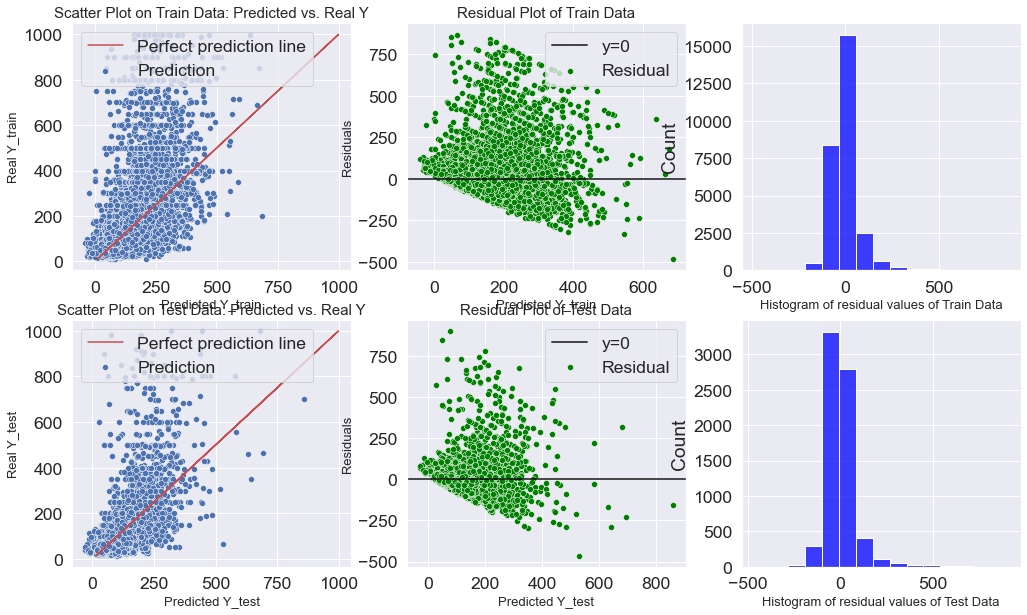

In [62]:
fig, ax = plt.subplots(figsize=(17, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(y_pred_train, y_train, label='Prediction')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=13)
# Set y-axis label
plt.ylabel('Real Y_train',fontsize=13)
plt.title("Scatter Plot on Train Data: Predicted vs. Real Y",fontsize=15)

plt.subplot(2, 3, 2)
sns.scatterplot(y_pred_train, y_train-y_pred_train, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=13)
# Set y-axis label
plt.ylabel('Residuals',fontsize=13)
plt.title("Residual Plot of Train Data",fontsize=15)

plt.subplot(2, 3, 3)
sns.histplot(y_train-y_pred_train, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Train Data',fontsize=13)

#for test data

plt.subplot(2, 3, 4)
sns.scatterplot(y_pred_test, y_test, label='Prediction')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=13)
# Set y-axis label
plt.ylabel('Real Y_test',fontsize=13)
plt.title("Scatter Plot on Test Data: Predicted vs. Real Y",fontsize=15)

plt.subplot(2, 3, 5)
sns.scatterplot(y_pred_test, y_test-y_pred_test, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=13)
# Set y-axis label
plt.ylabel('Residuals',fontsize=13)
plt.title("Residual Plot of Test Data",fontsize=15)

plt.subplot(2, 3, 6)
sns.histplot(y_test-y_pred_test, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Test Data',fontsize=13)


#### Linear Regression with Log Transformed price

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y_price_log, test_size = 0.2, random_state = 11)

In [64]:
print("X_train = ", X_train.shape,"\ny_train = ", y_train.shape, "\nX_test = ", X_test.shape,"\ny_test = ", y_test.shape)

X_train =  (28268, 13) 
y_train =  (28268,) 
X_test =  (7068, 13) 
y_test =  (7068,)


In [65]:
LR_log=LinearRegression(fit_intercept=True,n_jobs=-1)
LR_log.fit(X_train,y_train)

y_pred_test=LR_log.predict(X_test)
y_pred_train=LR_log.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'LR_LogTransformed_Price',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

model  R_sq_test  R_sq_train  RMSE_test  RMSE_train  \
0  LR_nonTransformed_Price   0.375502    0.375222  88.287178   86.649119   
1  LR_LogTransformed_Price   0.493277    0.493583   0.487893    0.483995   

   MAE_test  MAE_train  
0  34.69157  34.798179  
1   0.30389   0.303297

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as k

Text(0.5, 0, 'Histogram of residual values of Test Data')

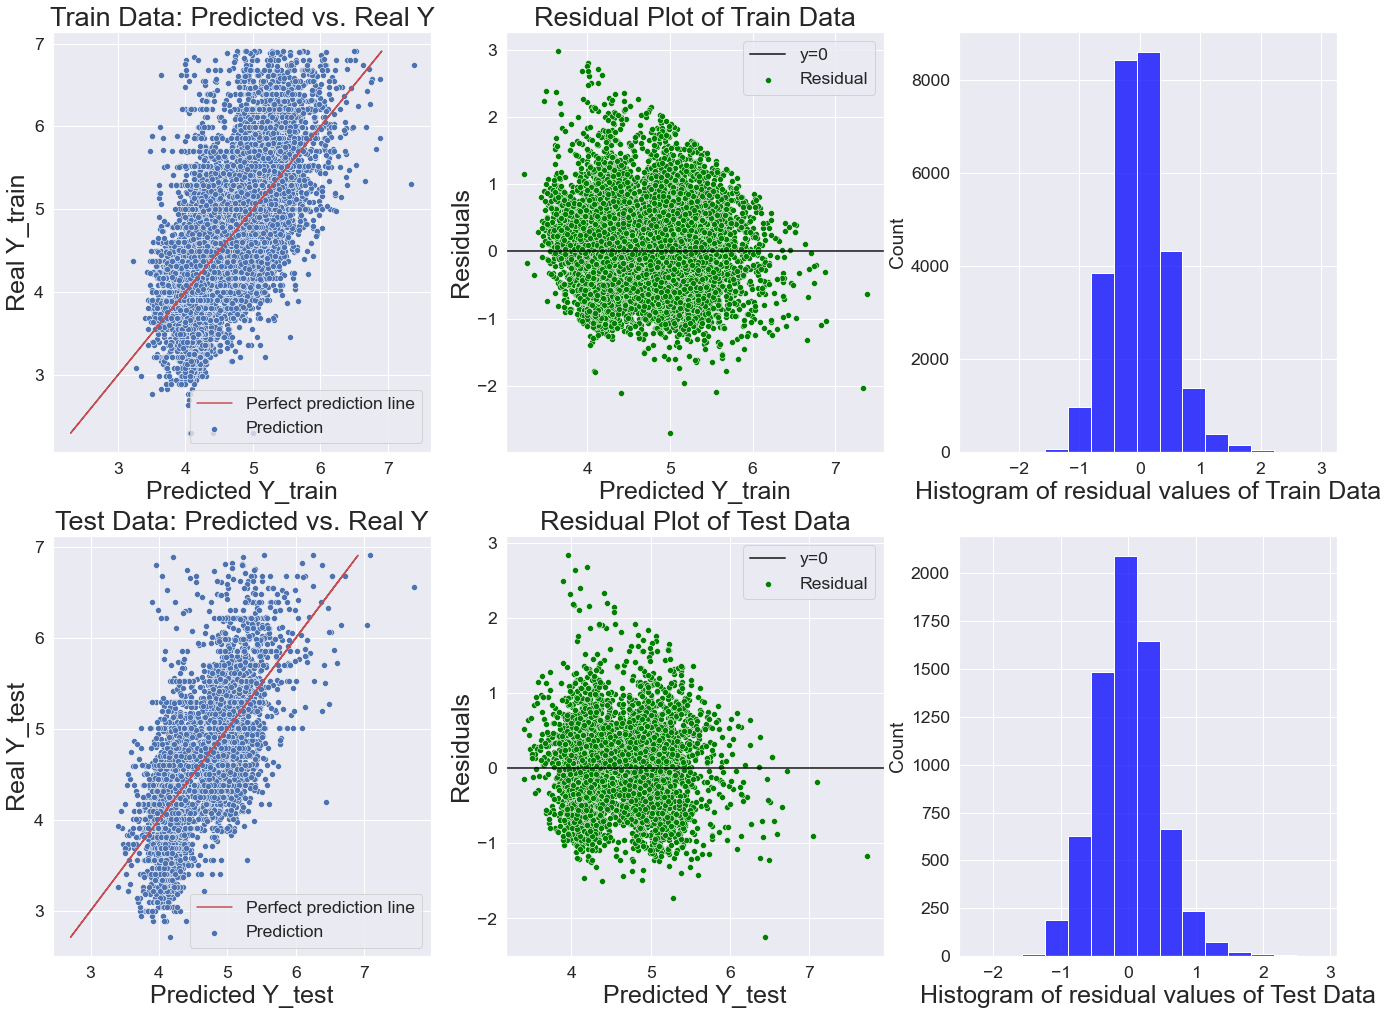

In [66]:
fig, ax = plt.subplots(figsize=(23, 17))
plt.subplot(2, 3, 1)
sns.scatterplot(y_pred_train, y_train, label='Prediction')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_train',fontsize=25)
plt.title("Train Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 2)
sns.scatterplot(y_pred_train, y_train-y_pred_train, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Train Data",fontsize=27)

plt.subplot(2, 3, 3)
sns.histplot(y_train-y_pred_train, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Train Data',fontsize=25)

#for test data

plt.subplot(2, 3, 4)
sns.scatterplot(y_pred_test, y_test, label='Prediction')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_test',fontsize=25)
plt.title("Test Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 5)
sns.scatterplot(y_pred_test, y_test-y_pred_test, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Test Data",fontsize=27)

plt.subplot(2, 3, 6)
sns.histplot(y_test-y_pred_test, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Test Data',fontsize=25)


Feature Scaling 

Two methods are usually well known for rescaling data, i.e., normalization and standarization. Normalization scales all numeric variables in the range [0,1]. So outliers might be lost. On the other hand, standarization transforms data to have zero mean and unit variance. Feature scaling helps gradient descent converge faster, thus reducing training time. Its not necessary to standarize the target variable. However, due to the presence of outliers, we would use sklearn's RobustScaler since it is not affected by outliers

Unlike the previous scalers, the centering and scaling statistics of RobustScaler is based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar: for both features most of the transformed values lie in a [-2, 3] range as seen in the zoomed-in figure. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required (see below).

In [67]:
#Initialize robust scaler object.'''
robust_scl = RobustScaler()

#Fit scaler object on train data.'''
robust_scl.fit(df_NYC)

df_NYC_scaled = robust_scl.transform(df_NYC)

In [68]:
#Retrive column names'''
df_NYC_scaled = pd.DataFrame(data = df_NYC_scaled, columns = df_NYC.columns, index = df_NYC.index)
df_NYC_scaled.head()

neighbourhood_group_cleansed  latitude  longitude  property_type  \
0                           0.0  0.391788    -0.5624      -0.684211   
1                          -1.0 -0.554918    -0.0822      -0.368421   
2                          -1.0 -0.530863    -0.0062       0.315789   
3                           0.0  0.544688    -0.5500       0.315789   
4                           0.0  1.057579    -0.2316       0.315789   

   room_type  accommodates  bathrooms  bedrooms  beds     price  \
0        0.0           0.0        0.0       0.0   0.0  0.011111   
1        0.0           0.5        0.0       0.0   2.0 -0.288889   
2        1.0           0.0        0.0       0.0   0.0 -0.433333   
3        1.0           0.0        0.0       0.0   0.0 -0.222222   
4        1.0          -0.5        0.0       0.0   0.0 -0.266667   

   minimum_nights  availability_365  review_scores_rating  instant_bookable  \
0        0.000000          1.067376                 0.000               0.0   
1       -1.115385          0.656028                 0.000               0.0   
2        0.000000          1.067376                 0.000               0.0   
3       -1.076923          0.989362                -0.125               0.0   
4       -1.076923         -0.226950                 0.000               0.0   

   price_log  
0   0.010969  
1  -0.332493  
2  -0.546524  
3  -0.246289  
4  -0.302995

#### Splitting Train and Test 

We only use log transformation price because it performed well before

In [69]:
#separating labels and predictors

X=df_NYC_scaled.drop(['price','price_log'],axis=1)
y_price_log=df_NYC_scaled['price_log'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y_price_log, test_size = 0.2, random_state = 11)

In [71]:
print("X_train = ", X_train.shape,"\ny_train = ", y_train.shape, "\nX_test = ", X_test.shape,"\ny_test = ", y_test.shape)

X_train =  (28268, 13) 
y_train =  (28268,) 
X_test =  (7068, 13) 
y_test =  (7068,)


#### Linear Regression with Log Transformed price and with Robust feature Scalling

In [72]:
LinearReg=LinearRegression(fit_intercept=True,n_jobs=-1)
LinearReg.fit(X_train,y_train)

y_pred_test=LinearReg.predict(X_test)
y_pred_train=LinearReg.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'LR_scaled_LogTransformed_Price',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

model  R_sq_test  R_sq_train  RMSE_test  \
0         LR_nonTransformed_Price   0.375502    0.375222  88.287178   
1         LR_LogTransformed_Price   0.493277    0.493583   0.487893   
2  LR_scaled_LogTransformed_Price   0.493277    0.493583   0.532465   

   RMSE_train   MAE_test  MAE_train  
0   86.649119  34.691570  34.798179  
1    0.483995   0.303890   0.303297  
2    0.528212   0.331652   0.331006

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as k

Text(0.5, 0, 'Histogram of residual values of Test Data')

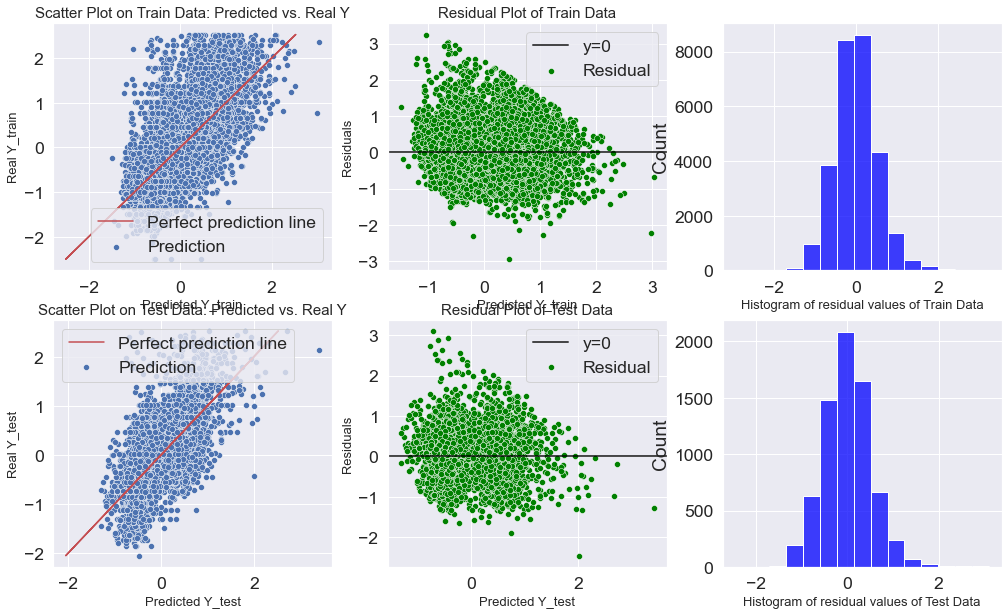

In [73]:
fig, ax = plt.subplots(figsize=(17, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(y_pred_train, y_train, label='Prediction')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=13)
# Set y-axis label
plt.ylabel('Real Y_train',fontsize=13)
plt.title("Scatter Plot on Train Data: Predicted vs. Real Y",fontsize=15)

plt.subplot(2, 3, 2)
sns.scatterplot(y_pred_train, y_train-y_pred_train, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=13)
# Set y-axis label
plt.ylabel('Residuals',fontsize=13)
plt.title("Residual Plot of Train Data",fontsize=15)

plt.subplot(2, 3, 3)
sns.histplot(y_train-y_pred_train, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Train Data',fontsize=13)

#for test data

plt.subplot(2, 3, 4)
sns.scatterplot(y_pred_test, y_test, label='Prediction')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=13)
# Set y-axis label
plt.ylabel('Real Y_test',fontsize=13)
plt.title("Scatter Plot on Test Data: Predicted vs. Real Y",fontsize=15)

plt.subplot(2, 3, 5)
sns.scatterplot(y_pred_test, y_test-y_pred_test, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=13)
# Set y-axis label
plt.ylabel('Residuals',fontsize=13)
plt.title("Residual Plot of Test Data",fontsize=15)

plt.subplot(2, 3, 6)
sns.histplot(y_test-y_pred_test, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Test Data',fontsize=13)


Text(0.5, 1.0, 'Q-Q plot for the test residuals')

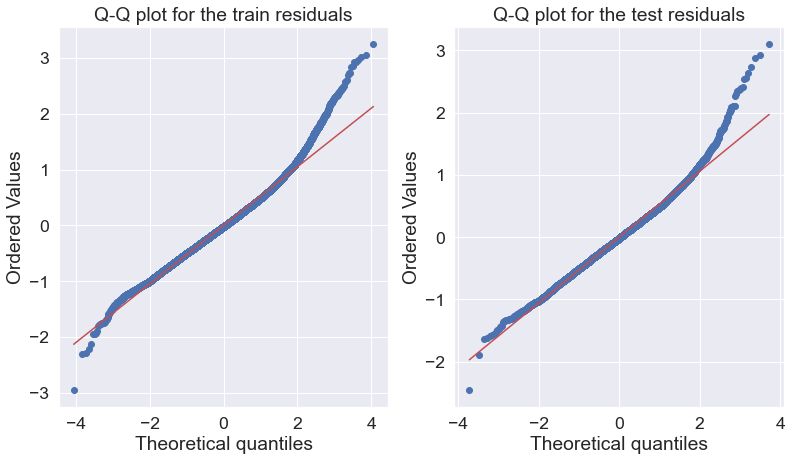

In [74]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.subplot(1, 2, 1)
stats.probplot(y_train-y_pred_train, dist="norm", plot=pylab)
plt.title("Q-Q plot for the train residuals")

plt.subplot(1, 2, 2)
stats.probplot(y_test-y_pred_test, dist="norm", plot=pylab)
plt.title("Q-Q plot for the test residuals")

# Decision Tree Regression Model

#### Decision Tree Regression with Non Transformed price

In [75]:
#separating labels and predictors

X=df_NYC.drop(['price','price_log'],axis=1)
y_price_log=df_NYC['price_log'].values
y_price=df_NYC['price'].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size = 0.2, random_state = 11)

In [77]:
DT_price=DecisionTreeRegressor(criterion='mse', splitter='best',min_samples_leaf =1)
DT_price.fit(X_train,y_train)

y_pred_test=DT_price.predict(X_test)
y_pred_train=DT_price.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'DT_nonTransformed_Price',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

model  R_sq_test  R_sq_train   RMSE_test  \
0         LR_nonTransformed_Price   0.375502    0.375222   88.287178   
1         LR_LogTransformed_Price   0.493277    0.493583    0.487893   
2  LR_scaled_LogTransformed_Price   0.493277    0.493583    0.532465   
3         DT_nonTransformed_Price   0.108536    0.999446  105.483359   

   RMSE_train   MAE_test  MAE_train  
0   86.649119  34.691570  34.798179  
1    0.483995   0.303890   0.303297  
2    0.528212   0.331652   0.331006  
3    2.579120  30.000000   0.000000

#### Decision Tree Regression with Log Transformed price

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y_price_log, test_size = 0.2, random_state = 11)

In [79]:
DT_log_price=DecisionTreeRegressor(criterion='mse', splitter='best',min_samples_leaf =1)
DT_log_price.fit(X_train,y_train)

y_pred_test=DT_log_price.predict(X_test)
y_pred_train=DT_log_price.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'DT_logTransformed_Price',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

model  R_sq_test  R_sq_train   RMSE_test  \
0         LR_nonTransformed_Price   0.375502    0.375222   88.287178   
1         LR_LogTransformed_Price   0.493277    0.493583    0.487893   
2  LR_scaled_LogTransformed_Price   0.493277    0.493583    0.532465   
3         DT_nonTransformed_Price   0.108536    0.999446  105.483359   
4         DT_logTransformed_Price   0.358838    0.999872    0.548811   

   RMSE_train   MAE_test  MAE_train  
0   86.649119  34.691570  34.798179  
1    0.483995   0.303890   0.303297  
2    0.528212   0.331652   0.331006  
3    2.579120  30.000000   0.000000  
4    0.007709   0.297252   0.000000

#### Decision Tree Regression with Log Transformed price and with Robust feature Scalling

In [80]:
#separating labels and predictors

X=df_NYC_scaled.drop(['price','price_log'],axis=1)
y_price_log=df_NYC_scaled['price_log'].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y_price_log, test_size = 0.2, random_state = 11)

In [82]:
DT_log_price_scaled=DecisionTreeRegressor(criterion='mse', splitter='best',min_samples_leaf =1)
DT_log_price_scaled.fit(X_train,y_train)

y_pred_test=DT_log_price_scaled.predict(X_test)
y_pred_train=DT_log_price_scaled.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'DT_scaled_LogTransformed_Price',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

model  R_sq_test  R_sq_train   RMSE_test  \
0         LR_nonTransformed_Price   0.375502    0.375222   88.287178   
1         LR_LogTransformed_Price   0.493277    0.493583    0.487893   
2  LR_scaled_LogTransformed_Price   0.493277    0.493583    0.532465   
3         DT_nonTransformed_Price   0.108536    0.999446  105.483359   
4         DT_logTransformed_Price   0.358838    0.999872    0.548811   
5  DT_scaled_LogTransformed_Price   0.350172    0.999872    0.602983   

   RMSE_train   MAE_test  MAE_train  
0   86.649119  34.691570  34.798179  
1    0.483995   0.303890   0.303297  
2    0.528212   0.331652   0.331006  
3    2.579120  30.000000   0.000000  
4    0.007709   0.297252   0.000000  
5    0.008413   0.329432   0.000000

Lets plot graph for Decision Tree Regression with Log Transformed price and with Robust feature Scalling

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as k

Text(0.5, 0, 'Histogram of residual values of Test Data')

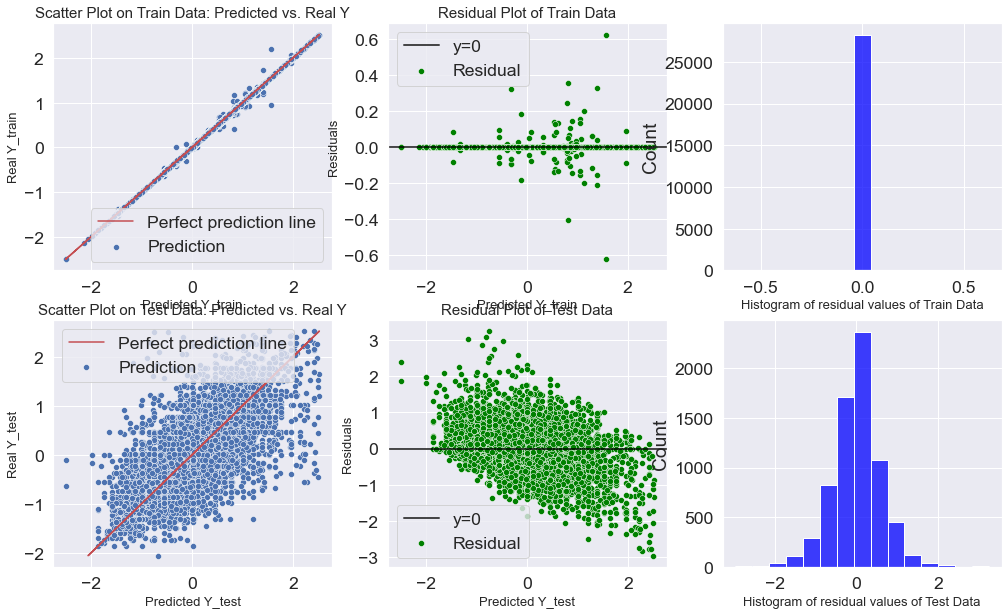

In [83]:
fig, ax = plt.subplots(figsize=(17, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(y_pred_train, y_train, label='Prediction')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=13)
# Set y-axis label
plt.ylabel('Real Y_train',fontsize=13)
plt.title("Scatter Plot on Train Data: Predicted vs. Real Y",fontsize=15)

plt.subplot(2, 3, 2)
sns.scatterplot(y_pred_train, y_train-y_pred_train, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=13)
# Set y-axis label
plt.ylabel('Residuals',fontsize=13)
plt.title("Residual Plot of Train Data",fontsize=15)

plt.subplot(2, 3, 3)
sns.histplot(y_train-y_pred_train, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Train Data',fontsize=13)

#for test data

plt.subplot(2, 3, 4)
sns.scatterplot(y_pred_test, y_test, label='Prediction')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=13)
# Set y-axis label
plt.ylabel('Real Y_test',fontsize=13)
plt.title("Scatter Plot on Test Data: Predicted vs. Real Y",fontsize=15)

plt.subplot(2, 3, 5)
sns.scatterplot(y_pred_test, y_test-y_pred_test, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=13)
# Set y-axis label
plt.ylabel('Residuals',fontsize=13)
plt.title("Residual Plot of Test Data",fontsize=15)

plt.subplot(2, 3, 6)
sns.histplot(y_test-y_pred_test, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Test Data',fontsize=13)


# Random Forest Regressor

Initially Apply Random Forest Regressor with default parameters without any hyper-parameter tuning 

In [84]:
#Random value for n_estimators let say 10.

rf = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=11)

#### Random Forest Regression with Log Transformed price

In [85]:
#separating labels and predictors
X=df_NYC.drop(['price','price_log'],axis=1)
y_price_log=df_NYC['price_log'].values

X_train, X_test, y_train, y_test = train_test_split(X, y_price_log, test_size = 0.2, random_state = 11)

In [86]:
rf.fit(X_train, y_train)

y_pred_test=rf.predict(X_test)
y_pred_train=rf.predict(X_train)
evaluation_df = evaluation_df.append({'model' : 'RF_Log_Price_without_tunning',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

model  R_sq_test  R_sq_train   RMSE_test  \
0         LR_nonTransformed_Price   0.375502    0.375222   88.287178   
1         LR_LogTransformed_Price   0.493277    0.493583    0.487893   
2  LR_scaled_LogTransformed_Price   0.493277    0.493583    0.532465   
3         DT_nonTransformed_Price   0.108536    0.999446  105.483359   
4         DT_logTransformed_Price   0.358838    0.999872    0.548811   
5  DT_scaled_LogTransformed_Price   0.350172    0.999872    0.602983   
6    RF_Log_Price_without_tunning   0.628073    0.933928    0.417992   

   RMSE_train   MAE_test  MAE_train  
0   86.649119  34.691570  34.798179  
1    0.483995   0.303890   0.303297  
2    0.528212   0.331652   0.331006  
3    2.579120  30.000000   0.000000  
4    0.007709   0.297252   0.000000  
5    0.008413   0.329432   0.000000  
6    0.174821   0.234359   0.085406

#### Random Forest Regression with Log Transformed price_Scalling

In [87]:
#separating labels and predictors
X=df_NYC_scaled.drop(['price','price_log'],axis=1)
y_price_log=df_NYC_scaled['price_log'].values

X_train, X_test, y_train, y_test = train_test_split(X, y_price_log, test_size = 0.2, random_state = 11)

In [88]:
rf.fit(X_train, y_train)

y_pred_test=rf.predict(X_test)
y_pred_train=rf.predict(X_train)
evaluation_df = evaluation_df.append({'model' : 'RF_scaled_Log_Price_without_tunning',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

model  R_sq_test  R_sq_train   RMSE_test  \
0              LR_nonTransformed_Price   0.375502    0.375222   88.287178   
1              LR_LogTransformed_Price   0.493277    0.493583    0.487893   
2       LR_scaled_LogTransformed_Price   0.493277    0.493583    0.532465   
3              DT_nonTransformed_Price   0.108536    0.999446  105.483359   
4              DT_logTransformed_Price   0.358838    0.999872    0.548811   
5       DT_scaled_LogTransformed_Price   0.350172    0.999872    0.602983   
6         RF_Log_Price_without_tunning   0.628073    0.933928    0.417992   
7  RF_scaled_Log_Price_without_tunning   0.625345    0.933763    0.457849   

   RMSE_train   MAE_test  MAE_train  
0   86.649119  34.691570  34.798179  
1    0.483995   0.303890   0.303297  
2    0.528212   0.331652   0.331006  
3    2.579120  30.000000   0.000000  
4    0.007709   0.297252   0.000000  
5    0.008413   0.329432   0.000000  
6    0.174821   0.234359   0.085406  
7    0.191031   0.258158   0.094660

As we saw there is not big defference in performance between scaled data and unscaled data so from now we only take unscaled data for simplicity and better understanding. As random forest has better performance let's keep optimizing it by hyperparameter tunning.

We need to find the values for below parameters
1) n_estimator

2) max_features

3) min_samples_leaf

In [89]:
#separating labels and predictors
X=df_NYC.drop(['price','price_log'],axis=1)
y_price_log=df_NYC['price_log'].values

X_train, X_test, y_train, y_test = train_test_split(X, y_price_log, test_size = 0.2, random_state = 11)



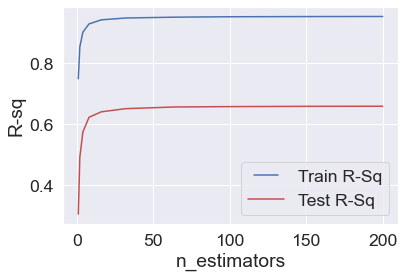

In [90]:
#optimizing number of estimators
train_results = []
test_results = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 150, 200]
for estimator in n_estimators:
    rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1, random_state=11)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    #rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),2)
    r2=r2_score(y_train, train_pred)
    train_results.append(r2)
    y_pred = rf.predict(X_test)
    #rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    r2=r2_score(y_test, y_pred)
    test_results.append(r2)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train R-Sq')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test R-Sq')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R-sq')
plt.xlabel('n_estimators')
plt.show()

Our model is highly overfitted since the R2 for training data is higher then the test dataset regardless of the number of estimators

For the test data, a minimum of 75 estimators appears to be sufficient

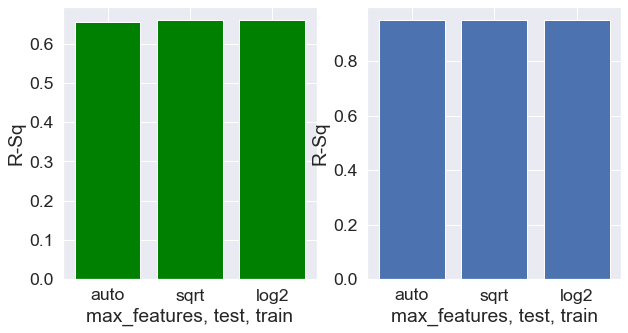

In [91]:
#optimizing max_features
train_results = []
test_results = []
max_features = ['auto','sqrt','log2']
for feature in max_features:
    rf = RandomForestRegressor(max_features=feature, n_estimators=75, n_jobs=-1, random_state=11)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    #rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),2)
    r2=r2_score(y_train, train_pred)
    train_results.append(r2)
    y_pred = rf.predict(X_test)
    #rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    r2=r2_score(y_test, y_pred)
    test_results.append(r2)
    
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(max_features,test_results, color='green')
plt.ylabel('R-Sq')
plt.xlabel('max_features, test, train')

plt.subplot(1, 2, 2)
plt.bar(max_features,train_results)
plt.ylabel('R-Sq')
plt.xlabel('max_features, test, train')

plt.show()

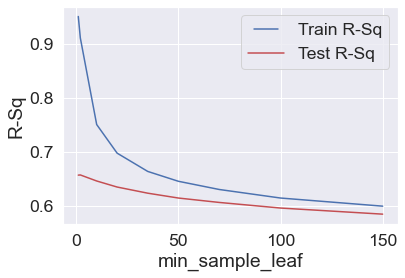

In [92]:
#optimizing min_sample_leaf
train_results = []
test_results = []
min_samples_leaf = [1,2,10,20,35,50,70,100,150]
for leaf in min_samples_leaf:
    rf = RandomForestRegressor(min_samples_leaf = leaf, max_features='auto', n_estimators=75, n_jobs=-1, random_state=11)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    r2=r2_score(y_train, train_pred)
    train_results.append(r2)
    y_pred = rf.predict(X_test)
    #rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    r2=r2_score(y_test, y_pred)
    test_results.append(r2)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train R-Sq')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test R-Sq')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R-Sq')
plt.xlabel('min_sample_leaf')
plt.show()

The above graph shows that the model provides the best performance min_samples_leaf 10

Based on the hyperparameter optimization the best hyperparameter conditions are:

n_estimator = 75

max_features = 'auto'

min_samples_leaf = 10

Next, apply these parameters to see how the overall model performs:

#### Apply the hyperparameter optmized model

In [93]:
rf_final=RandomForestRegressor(n_estimators = 75, max_features = 'auto', min_samples_leaf=10, random_state=11)
rf_final.fit(X_train,y_train)

y_pred_test=rf_final.predict(X_test)
y_pred_train=rf_final.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'RF_scaled_Log_Price_with_tunning',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

model  R_sq_test  R_sq_train   RMSE_test  \
0              LR_nonTransformed_Price   0.375502    0.375222   88.287178   
1              LR_LogTransformed_Price   0.493277    0.493583    0.487893   
2       LR_scaled_LogTransformed_Price   0.493277    0.493583    0.532465   
3              DT_nonTransformed_Price   0.108536    0.999446  105.483359   
4              DT_logTransformed_Price   0.358838    0.999872    0.548811   
5       DT_scaled_LogTransformed_Price   0.350172    0.999872    0.602983   
6         RF_Log_Price_without_tunning   0.628073    0.933928    0.417992   
7  RF_scaled_Log_Price_without_tunning   0.625345    0.933763    0.457849   
8     RF_scaled_Log_Price_with_tunning   0.645984    0.750590    0.407803   

   RMSE_train   MAE_test  MAE_train  
0   86.649119  34.691570  34.798179  
1    0.483995   0.303890   0.303297  
2    0.528212   0.331652   0.331006  
3    2.579120  30.000000   0.000000  
4    0.007709   0.297252   0.000000  
5    0.008413   0.329432   0.000000  
6    0.174821   0.234359   0.085406  
7    0.191031   0.258158   0.094660  
8    0.339659   0.236880   0.195675

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as k

Text(0.5, 0, 'Histogram of residual values of Test Data')

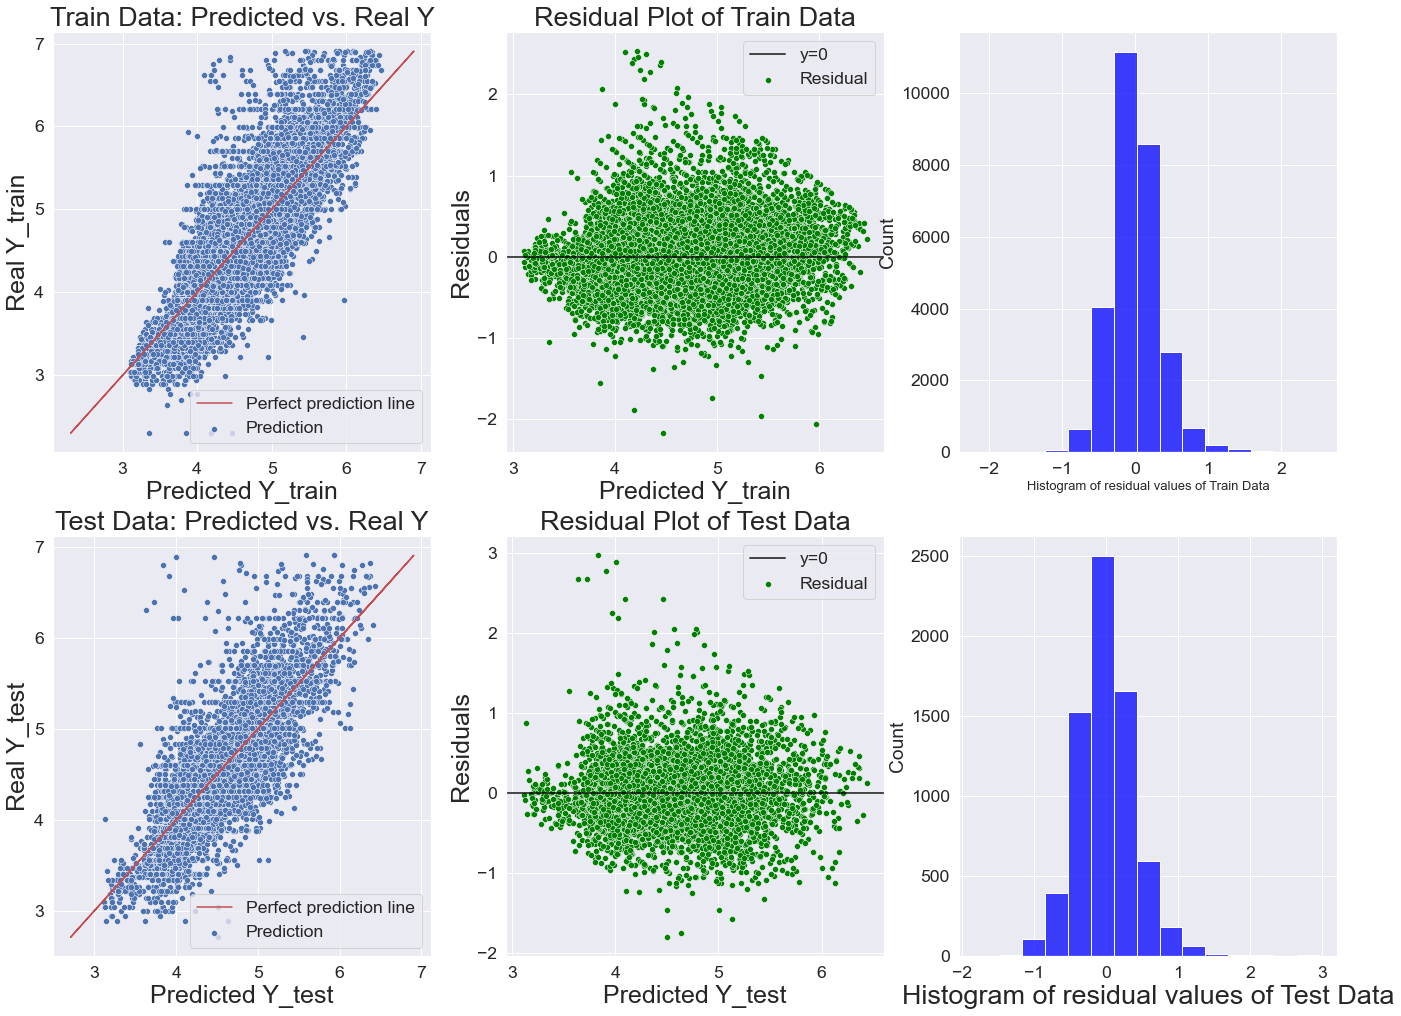

In [94]:
fig, ax = plt.subplots(figsize=(23, 17))
plt.subplot(2, 3, 1)
sns.scatterplot(y_pred_train, y_train, label='Prediction')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_train',fontsize=25)
plt.title("Train Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 2)
sns.scatterplot(y_pred_train, y_train-y_pred_train, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Train Data",fontsize=27)

plt.subplot(2, 3, 3)
sns.histplot(y_train-y_pred_train, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Train Data',fontsize=13)

#for test data

plt.subplot(2, 3, 4)
sns.scatterplot(y_pred_test, y_test, label='Prediction')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_test',fontsize=25)
plt.title("Test Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 5)
sns.scatterplot(y_pred_test, y_test-y_pred_test, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Test Data",fontsize=27)

plt.subplot(2, 3, 6)
sns.histplot(y_test-y_pred_test, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Test Data',fontsize=27)


Now Next, we will check what features are important in the model:

Number of important features: 13

Top fifteen features by importance:


<AxesSubplot:>

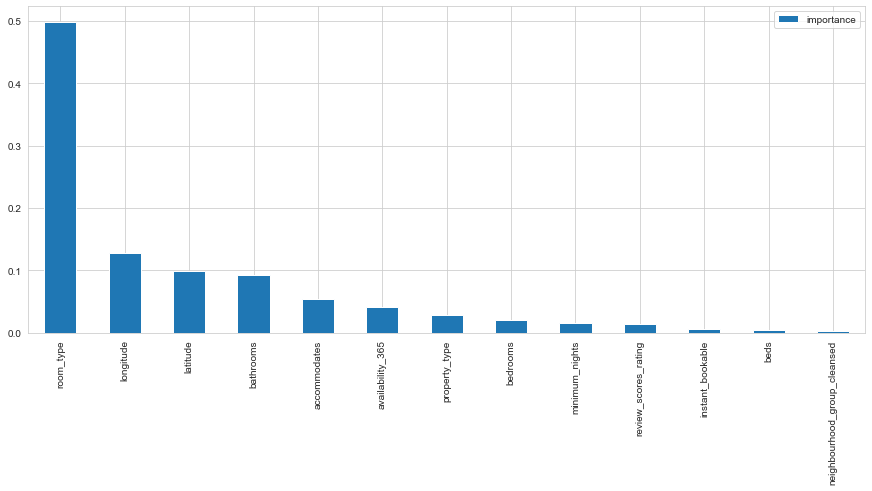

In [103]:
#derive important features
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("Number of important features: "+str(feature_importances[feature_importances["importance"]!=0].shape[0]))
print("\nTop fifteen features by importance:")
feature_importances[feature_importances["importance"]!=0].plot(kind='bar', figsize=(15,6))